In [40]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import statsmodels.api as sm

Scikit-Learn 의 PCA 기능

## 2 Dimension of PCA

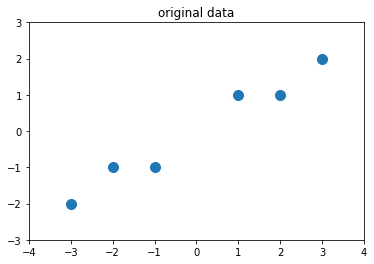

array([[-1, -1],
       [-2, -1],
       [-3, -2],
       [ 1,  1],
       [ 2,  1],
       [ 3,  2]])

In [23]:
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
plt.scatter(X[:,0], X[:,1], s=100)
plt.xlim(-4,4)
plt.ylim(-3,3)
plt.title("original data")
plt.show()
X

In [6]:
from sklearn.decomposition import PCA

In [9]:
pca = PCA(n_components=2)
pca.fit(X)
# 차원을 줄이지 않고 PCA를 쓰면 직교하는 좌표계로 변환하기만 한다.

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [8]:
Z = pca.transform(X)
Z

array([[ 1.38340578,  0.2935787 ],
       [ 2.22189802, -0.25133484],
       [ 3.6053038 ,  0.04224385],
       [-1.38340578, -0.2935787 ],
       [-2.22189802,  0.25133484],
       [-3.6053038 , -0.04224385]])

In [24]:
w, U = np.linalg.eig(pca.get_covariance())
w,U

(array([7.93954312, 0.06045688]), array([[ 0.83849224, -0.54491354],
        [ 0.54491354,  0.83849224]]))

In [12]:
U.T.dot(X.T).T

array([[-1.38340578, -0.2935787 ],
       [-2.22189802,  0.25133484],
       [-3.6053038 , -0.04224385],
       [ 1.38340578,  0.2935787 ],
       [ 2.22189802, -0.25133484],
       [ 3.6053038 ,  0.04224385]])

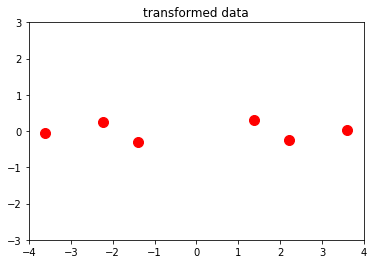

In [13]:
plt.scatter(Z[:,0], Z[:,1], c='r', s=100)
plt.xlim(-4,4)
plt.ylim(-3,3)
plt.title("transformed data")
plt.show()

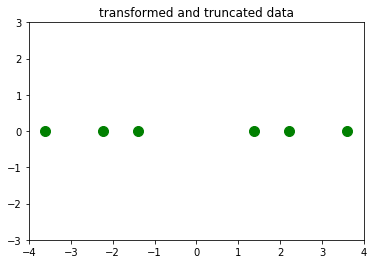

In [14]:
plt.scatter(Z[:,0], np.zeros_like(Z[:,1]), c='g', s=100)
plt.xlim(-4,4)
plt.ylim(-3,3)
plt.title("transformed and truncated data")
plt.show()

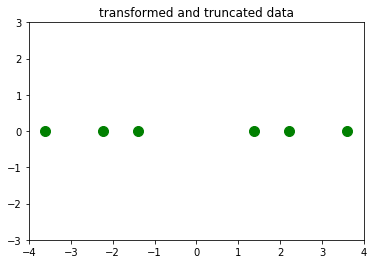

In [20]:
Z = PCA(n_components=1).fit_transform(X)

plt.scatter(Z,np.zeros_like(Z), c='g',s=100)
plt.xlim(-4,4)
plt.ylim(-3,3)
plt.title('transformed and truncated data')
plt.show()

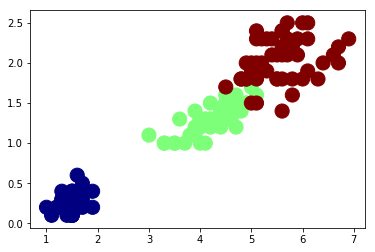

In [25]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data[:, 2:]
plt.scatter(X[:, 0], X[:, 1], c=iris.target, s=200, cmap=plt.cm.jet);

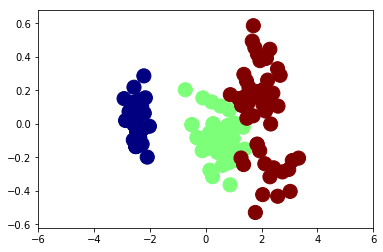

In [26]:
model2 = PCA(2).fit(X)
X2 = model2.transform(X)
plt.scatter(X2[:, 0], X2[:, 1], c=iris.target, s=200, cmap=plt.cm.jet)
plt.xlim(-6, 6)
plt.show()
# <transform method>
# X is projected on the first principal components previously extracted
# from a training set.

In [32]:
model2.components_
# components_ mothod
# 주성분 축

array([[ 0.92154695,  0.38826694],
       [-0.38826694,  0.92154695]])

/home/hskimim/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/hskimim/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/hskimim/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


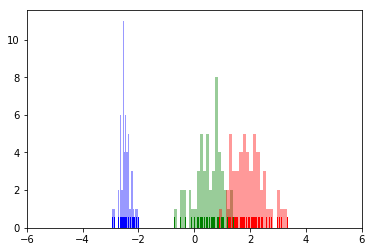

In [35]:
model1 = PCA(1).fit(X)
X1 = model1.transform(X)
sns.distplot(X1[iris.target==0], color="b", bins=20, rug=True, kde=False)
sns.distplot(X1[iris.target==1], color="g", bins=20, rug=True, kde=False)
sns.distplot(X1[iris.target==2], color="r", bins=20, rug=True, kde=False)
plt.xlim(-6, 6)
plt.show()

In [36]:
model1.components_


array([[0.92154695, 0.38826694]])

In [37]:
from sklearn.datasets import load_boston
boston = load_boston()

dfX0 = pd.DataFrame(boston.data, columns=boston.feature_names)

from patsy import dmatrix

formula = "scale(CRIM) + scale(ZN) + scale(INDUS) + " + \
    "scale(NOX) + scale(RM) + scale(AGE) + " + \
    "scale(np.log(DIS)) + scale(RAD) + scale(TAX) + " + \
    "scale(np.log(PTRATIO)) + scale(B) + scale(np.log(LSTAT)) + CHAS"
dfX = dmatrix(formula, dfX0, return_type="dataframe")
dfy = pd.DataFrame(boston.target, columns=["MEDV"])

In [38]:
idx_outlier = \
    np.array([  7,  54, 148, 152, 160, 214, 267, 364, 365, 367, 368, 369, 371,
              372, 380, 385, 397, 398, 399, 400, 401, 405, 409, 410, 412, 413,
              415, 416, 418, 419, 426, 466, 489, 490, 492, 495, 505, 161, 162,
              163, 166, 186, 195, 204, 225, 257, 267, 283, 368, 369, 370, 371, 372])
    
idx = list(set(range(len(dfX))).difference(idx_outlier))
dfX = dfX.iloc[idx, :].reset_index(drop=True)
dfy = dfy.iloc[idx, :].reset_index(drop=True)

In [41]:
model_boston1 = sm.OLS(np.log(dfy), dfX)
result_boston1 = model_boston1.fit()
print(result_boston1.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.864
Method:                 Least Squares   F-statistic:                     223.9
Date:                Sun, 08 Jul 2018   Prob (F-statistic):          1.49e-185
Time:                        17:13:47   Log-Likelihood:                 302.66
No. Observations:                 458   AIC:                            -577.3
Df Residuals:                     444   BIC:                            -519.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  3

In [42]:
dfX2 = sm.add_constant(pd.DataFrame(PCA(n_components=8).fit_transform(dfX)))
model_boston2 = sm.OLS(np.log(dfy), dfX2)
result_boston2 = model_boston2.fit()
print(result_boston2.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     287.0
Date:                Sun, 08 Jul 2018   Prob (F-statistic):          3.47e-171
Time:                        17:14:13   Log-Likelihood:                 254.16
No. Observations:                 458   AIC:                            -490.3
Df Residuals:                     449   BIC:                            -453.2
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0391      0.007    463.560      0.0